In [ ]:
from __future__ import print_function
import torch

In [ ]:
x = torch.empty(5, 3)
print(x)

tensor([[2.3683e-35, 0.0000e+00, 3.3631e-44],
        [0.0000e+00,        nan, 0.0000e+00],
        [1.1578e+27, 1.1362e+30, 7.1547e+22],
        [4.5828e+30, 1.2121e+04, 7.1846e+22],
        [9.2198e-39, 7.0374e+22, 0.0000e+00]])


In [ ]:
x = torch.zeros(5, 3, dtype=torch.long)
print(x)

tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]])


In [ ]:
x = x.new_ones(5, 3, dtype=torch.double)
print(x)

x = torch.randn_like(x, dtype=torch.float)
print(x)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)
tensor([[-1.0302,  1.7012, -0.7340],
        [ 2.2964, -0.0095, -0.6068],
        [ 0.1413,  2.1684,  1.4282],
        [ 0.2406, -0.1405, -0.3769],
        [ 0.1916,  0.1641, -0.0908]])


In [ ]:
print(x.size())

torch.Size([5, 3])


In [ ]:
y = torch.rand(5, 3)
print(x)
print(y)
print(x + y) #加算
print(torch.add(x, y)) #加算
result = torch.empty(5, 3)
torch.add(x, y, out=result) #x + y > result
print(result)
y.add_(x) #add x to y
print(y)

tensor([[-1.0302,  1.7012, -0.7340],
        [ 2.2964, -0.0095, -0.6068],
        [ 0.1413,  2.1684,  1.4282],
        [ 0.2406, -0.1405, -0.3769],
        [ 0.1916,  0.1641, -0.0908]])
tensor([[0.5693, 0.8907, 0.2553],
        [0.0766, 0.2596, 0.4199],
        [0.2594, 0.8184, 0.6016],
        [0.3962, 0.1437, 0.1725],
        [0.6927, 0.5439, 0.3865]])
tensor([[-0.4608,  2.5919, -0.4787],
        [ 2.3730,  0.2501, -0.1868],
        [ 0.4007,  2.9868,  2.0298],
        [ 0.6368,  0.0033, -0.2044],
        [ 0.8843,  0.7080,  0.2956]])
tensor([[-0.4608,  2.5919, -0.4787],
        [ 2.3730,  0.2501, -0.1868],
        [ 0.4007,  2.9868,  2.0298],
        [ 0.6368,  0.0033, -0.2044],
        [ 0.8843,  0.7080,  0.2956]])
tensor([[-0.4608,  2.5919, -0.4787],
        [ 2.3730,  0.2501, -0.1868],
        [ 0.4007,  2.9868,  2.0298],
        [ 0.6368,  0.0033, -0.2044],
        [ 0.8843,  0.7080,  0.2956]])
tensor([[-0.4608,  2.5919, -0.4787],
        [ 2.3730,  0.2501, -0.1868],
        [ 0

In [ ]:
print(x)
print(x[:, 1])

tensor([[-1.0302,  1.7012, -0.7340],
        [ 2.2964, -0.0095, -0.6068],
        [ 0.1413,  2.1684,  1.4282],
        [ 0.2406, -0.1405, -0.3769],
        [ 0.1916,  0.1641, -0.0908]])
tensor([ 1.7012, -0.0095,  2.1684, -0.1405,  0.1641])


In [ ]:
x = torch.randn(4, 4)
y = x.view(16) #リサイズ
z = x.view(-1, 8)
print(x.size(), y.size(), z.size())

torch.Size([4, 4]) torch.Size([16]) torch.Size([2, 8])


In [ ]:
x = torch.randn(1)
print(x)
print(x.item())

tensor([-0.0187])
-0.018712317571043968


In [ ]:
# Teosor -> Numpy
a = torch.ones(5)
print(a) # Tensor
b = a.numpy()
print(b) # Numpy

a.add_(1)
print(a)
print(b) #参照,bも変更される

# Tensor -> Numpy
import numpy as np
a = np.ones(5) # Numpy
b = torch.from_numpy(a) # Tensor
np.add(a, 1, out=a)
print(a)
print(b) #参照,bも変更

tensor([1., 1., 1., 1., 1.])
[1. 1. 1. 1. 1.]
tensor([2., 2., 2., 2., 2.])
[2. 2. 2. 2. 2.]
[2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2.], dtype=torch.float64)


In [ ]:
if torch.cuda.is_available():
  device = torch.device('cuda') # CUDA object
  y = torch.ones_like(x, device=device) # Tensor on GPU  
  x = x.to(device)
  z = x + y
  print(z)
  print(z.to('cpu', torch.double))

tensor([0.9813], device='cuda:0')
tensor([0.9813], dtype=torch.float64)


Autograd 自動微分
Tensorクラスの属性 .requires_gradをTrueに設定することで利用できる

In [ ]:
import torch

x = torch.ones(2, 2, requires_grad=True)
print(x)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)


In [ ]:
y = x + 2
print(y)

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)


In [ ]:
print(y.grad_fn)

In [ ]:
z = y * y *3
out = z.mean()
print(z, out)

tensor([[27., 27.],
        [27., 27.]], grad_fn=<MulBackward0>) tensor(27., grad_fn=<MeanBackward0>)


In [ ]:
a = torch.randn(2, 2)
a = ((a * 3) / (a - 1))
print(a.requires_grad)
a.requires_grad_(True)
print(a.requires_grad)
b = (a * a).sum()
print(b.grad_fn)

False
True


勾配 backward()で計算させる (requires_grad がTrue)

In [ ]:
out.backward()

In [ ]:
print(x.grad)

tensor([[4.5000, 4.5000],
        [4.5000, 4.5000]])


In [ ]:
x = torch.randn(3, requires_grad=True)

y = x * 2
while y.data.norm() < 1000:
  y = y + 2
print(y)

tensor([577.0291, 581.4231, 575.4341], grad_fn=<AddBackward0>)


In [ ]:
v = torch.tensor([0.1, 1.0, 0.0001], dtype=torch.float)
y.backward(v)
 
print(x.grad)

tensor([2.0000e-01, 2.0000e+00, 2.0000e-04])


In [ ]:
print(x.requires_grad)
print((x ** 2).requires_grad)
 
with torch.no_grad():
    print((x ** 2).requires_grad)

print('-----------')

print(x.requires_grad)
y = x.detach()
print(y.requires_grad)
print(x.eq(y).all())

True
True
False
-----------
True
False
tensor(True)


ニューラルネットワーク

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
 
 
class Net(nn.Module):
 
    def __init__(self):
        super(Net, self).__init__()
        # 1 input image channel, 6 output channels, 3x3 square convolution
        # kernel
        self.conv1 = nn.Conv2d(1, 6, 3)
        self.conv2 = nn.Conv2d(6, 16, 3)
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(16 * 6 * 6, 120)  # 6*6 from image dimension
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
 
    def forward(self, x):
        # Max pooling over a (2, 2) window
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        # If the size is a square you can only specify a single number
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
 
    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features
 
 
net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=576, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


backward()は自動で計算されるため、forward()のみ記述すればよい

In [ ]:
params = list(net.parameters())
print(len(params))
print(params[0].size()) # Conv1

10
torch.Size([6, 1, 3, 3])


In [ ]:
input = torch.randn(1, 1, 32, 32)
out = net(input)
print(out)

tensor([[ 0.0457, -0.0411, -0.0794, -0.0234,  0.0292,  0.0416,  0.0873,  0.0241,
          0.0915, -0.0072]], grad_fn=<AddmmBackward>)


In [ ]:
net.zero_grad()
out.backward(torch.randn(1, 10)) #勾配計算

損失関数

In [ ]:
output = net(input)
target = torch.randn(10)  # a dummy target, for example
target = target.view(1, -1)  # make it the same shape as output
criterion = nn.MSELoss() #平均2乗誤差
 
loss = criterion(output, target)
print(loss)

tensor(1.3159, grad_fn=<MseLossBackward>)


In [ ]:
# input -> ... -> relu -> linear -> MSELoss -> loss
print(loss.grad_fn) #MSELoss
print(loss.grad_fn.next_functions[0][0]) #Linear
print(loss.grad_fn.next_functions[0][0].next_functions[0][0]) #relu

In [ ]:
net.zero_grad() #biasの初期化

print('conv1.bias.grad before backward')
print(net.conv1.bias.grad)
 
loss.backward()
 
print('conv1.bias.grad after backward')
print(net.conv1.bias.grad)

conv1.bias.grad before backward
tensor([0., 0., 0., 0., 0., 0.])
conv1.bias.grad after backward
tensor([ 0.0413,  0.0106, -0.0132,  0.0038, -0.0134,  0.0301])


重みの更新

In [ ]:
lr = 0.01
for f in net.parameters():
  f.data.sub_(f.grad.data * lr)

In [ ]:
import torch.optim as optim
 
# create your optimizer
optimizer = optim.SGD(net.parameters(), lr=0.01)
 
# in your training loop:
optimizer.zero_grad()   # zero the gradient buffers
output = net(input)
loss = criterion(output, target)
loss.backward()
optimizer.step()    # Does the update

分類期の訓練
画像データなどの読み込みにtorchvisionが利用できる

CIFAR10 をロードして正規化する

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms

In [ ]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
 
#dataの読み込み
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)
 
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)
 
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


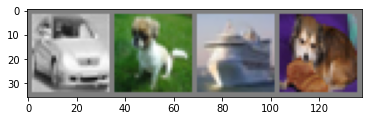

  car   dog  ship   dog


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
 
# functions to show an image
 
 
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()
 
 
# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()
 
# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [ ]:
import torch.nn as nn
import torch.nn.functional as F
 
 
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
 
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
 
 
net = Net()

畳込みニューラルネットワークを定義する\
チャンネル数を3に拡張

In [ ]:
import torch.nn as nn
import torch.nn.functional as F
 
 
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
 
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
 
 
net = Net()

損失関数とオプティマイザーを定義する

In [ ]:
import torch.optim as optim
 
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

ネットワークを訓練する

In [ ]:
for epoch in range(2):  # loop over the dataset multiple times
 
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
 
        # zero the parameter gradients
        optimizer.zero_grad()
 
        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
 
        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0
 
print('Finished Training')

[1,  2000] loss: 2.227
[1,  4000] loss: 1.904
[1,  6000] loss: 1.666
[1,  8000] loss: 1.581
[1, 10000] loss: 1.508
[1, 12000] loss: 1.442
[2,  2000] loss: 1.377
[2,  4000] loss: 1.346
[2,  6000] loss: 1.339
[2,  8000] loss: 1.293
[2, 10000] loss: 1.254
[2, 12000] loss: 1.282
Finished Training


In [ ]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

テストする

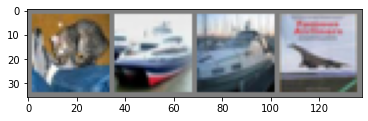

GroundTruth:    cat  ship  ship plane


In [ ]:
dataiter = iter(testloader)
images, labels = dataiter.next()
 
# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [ ]:
# セーブされたモデルの再ロード
net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [ ]:
outputs = net(images)

In [ ]:
_, predicted = torch.max(outputs, 1)
 
print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:    cat  ship  ship plane


うまく機能しているようである

In [ ]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
 
print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 56 %


In [ ]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1
 
 
for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))
    

Accuracy of plane : 64 %
Accuracy of   car : 64 %
Accuracy of  bird : 36 %
Accuracy of   cat : 39 %
Accuracy of  deer : 55 %
Accuracy of   dog : 40 %
Accuracy of  frog : 68 %
Accuracy of horse : 64 %
Accuracy of  ship : 59 %
Accuracy of truck : 73 %


クラスごとの精度が確認できた

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
 
# Assuming that we are on a CUDA machine, this should print a CUDA device:
 
print(device)

cuda:0


In [ ]:
inputs, labels = data[0].to(device), data[1].to(device)